In [ ]:
import pandas as pd

# Ruta de los datos (ajusta el XX con tu número de dataset)
data_path = "/content/attrition_availabledata_07.csv.gz"
df = pd.read_csv(data_path, compression='gzip')

In [ ]:
# Ver las primeras filas. Exploracion inicial
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.839499,6,3,3,3.0,3.0,4.0,40,Travel_Rarely,Research & Development,...,Y,17,8,0,21.0,4,20,4,9,No
1,7.204763,10,3,3,3.0,4.0,3.0,42,Travel_Rarely,Research & Development,...,Y,15,8,0,10.0,5,10,2,2,No
2,6.272837,12,2,3,2.0,1.0,3.0,38,Travel_Rarely,Sales,...,Y,18,8,0,11.0,5,7,1,7,No
3,6.038788,13,4,3,3.0,2.0,3.0,40,Travel_Frequently,Research & Development,...,Y,13,8,1,8.0,3,8,3,7,No
4,6.726167,17,3,3,2.0,2.0,3.0,36,Travel_Frequently,Research & Development,...,Y,13,8,0,6.0,5,6,0,3,No


In [ ]:
# Ver cantidad de valores nulos por columna.
# Filtrar solo las columnas que tienen valores nulos.
df.isnull().sum()   #hay que expandir la felchita de celdas de fila para ver todas las columnas con valores nulos

,0
hrs,0
absences,0
JobInvolvement,0
PerformanceRating,0
EnvironmentSatisfaction,20
JobSatisfaction,16
WorkLifeBalance,24
Age,0
BusinessTravel,0
Department,0


In [ ]:
# Extra

# Ver cantidad de valores nulos por columna.
# Filtrar solo las columnas que tienen valores nulos.

# identifica y muestra solo las columnas que contienen valores nulos en el DataFrame df,
# pero en este caso filtra aquellas que tienen al menos 1 valor nulo (>= 1).
df.isnull().sum()[df.isnull().sum() >= 1]

,0
EnvironmentSatisfaction,20
JobSatisfaction,16
WorkLifeBalance,24
NumCompaniesWorked,15
TotalWorkingYears,7


In [ ]:
# Rellena las columnas con valores nulos. Esto es debido a que consideramos que en estas variables un valor nulo es 0
# También puede rellenarse estos datos con la media o la mediana para dar resultados diferentes dependiendo de como interpretemos las ausencias.
df.fillna(df.mean(), inplace=True)
df.fillna(df.median(), inplace=True)
# Nosotros rellenamos los nulos en el eda por consideración técnica pero esto puede ser hecho en el modelo con los inputadores.
df.fillna(0, inplace=True)

In [ ]:
# Ver información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2940 non-null   float64
 5   JobSatisfaction          2940 non-null   float64
 6   WorkLifeBalance          2940 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

In [ ]:
# Mostrar los tipos de datos de cada columna
df.dtypes

,0
hrs,float64
absences,int64
JobInvolvement,int64
PerformanceRating,int64
EnvironmentSatisfaction,float64
JobSatisfaction,float64
WorkLifeBalance,float64
Age,int64
BusinessTravel,object
Department,object


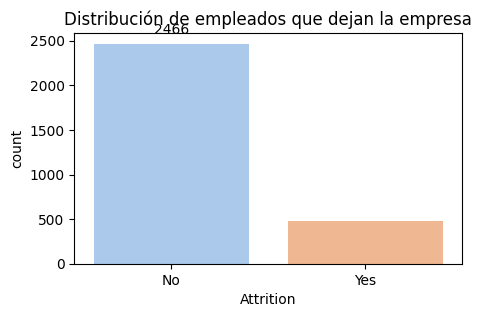

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de la variable objetivo (Attrition)
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=df["Attrition"], hue=df["Attrition"], palette="pastel", legend=False)

# Agregar etiquetas en las barras automáticamente
ax.bar_label(ax.containers[0], fmt='%d', fontsize=10, padding=5, color='black')

plt.title("Distribución de empleados que dejan la empresa")
plt.show()

In [ ]:
# Verificar si el dataset está desbalanceado
attrition_counts = df["Attrition"].value_counts(normalize=True)

In [ ]:
# Distribución de la variable objetivo (Attrition)
attrition_counts

,proportion
Attrition,
No,0.838776
Yes,0.161224


In [ ]:
if attrition_counts.min() < 0.3:
    print("El dataset está DESBALANCEADO. Se recomienda manejar esto en el preprocesamiento.")
else:
    print("El dataset NO está desbalanceado.")

El dataset está DESBALANCEADO. Se recomienda manejar esto en el preprocesamiento.


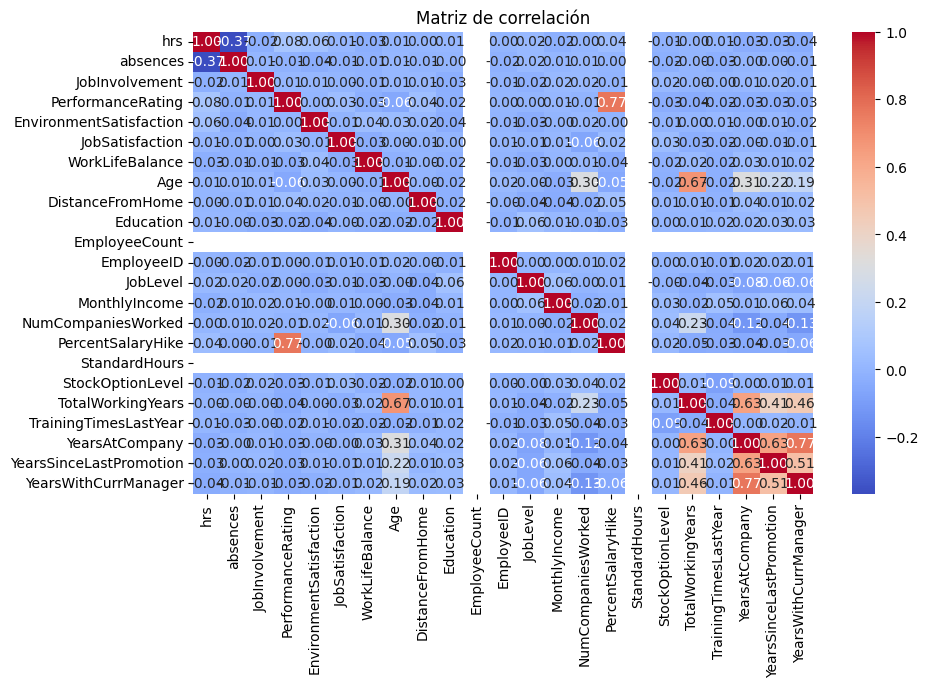

In [ ]:
corr = df.select_dtypes(include=[int, float]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [ ]:
### La gran mayoría de empleados no abandona (No).
### Solo una pequeña fracción abandona (Yes).
### Esto indica que el dataset está desbalanceado, lo cual puede afectar el rendimiento de los modelos de ML.

In [ ]:
# Eliminar variables irrelevantes o altamente correlacionadas, i.e;
# Eliminamos algunas variables que no tengan ningun tipo de utilidad
# Eliminamos una variable si hay dos que son muy similares (PercentSalaryHike y Performance) y (YearsWithCurrManager y Years at the company

# Eliminar variables irrelevantes o altamente correlacionadas antes de codificar
columnas_a_eliminar = ["EmployeeID", "YearsWithCurrManager", "PercentSalaryHike"]
columnas_existentes = list(set(columnas_a_eliminar).intersection(df.columns))
df = df.drop(columnas_existentes, axis=1)

In [ ]:
# Convertir variables categóricas en numéricas con One-Hot Encoding
df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)

In [ ]:
# Verificar tipos de datos después de la conversión
df.dtypes

,0
hrs,float64
absences,int64
JobInvolvement,int64
PerformanceRating,int64
EnvironmentSatisfaction,float64
JobSatisfaction,float64
WorkLifeBalance,float64
Age,int64
DistanceFromHome,int64
Education,int64


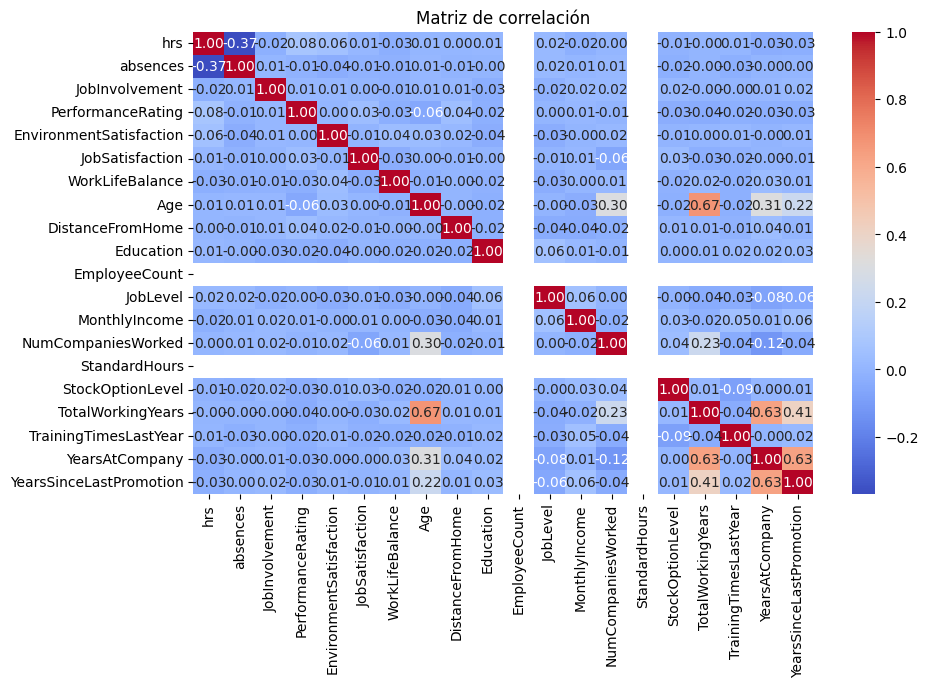

In [ ]:
# Crear y mostrar una matriz de correlación para variables numéricas
corr = df.select_dtypes(include=[int, float]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Guardar dataset preprocesado con un nuevo nombre
df.to_csv("/content/attrition_cleaned.csv", index=False)
print("Dataset preprocesado guardado como 'attrition_cleaned.csv'")

Dataset preprocesado guardado como 'attrition_cleaned.csv'
